In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import os

from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# stores.csv

In [5]:
stores = pd.read_csv("data/stores.csv")
print(f"Shape of stores.csv: {stores.shape}")
stores.head()

Shape of stores.csv: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
print("Types of stores:")
stores['Type'].value_counts()

Types of stores:


Type
A    22
B    17
C     6
Name: count, dtype: int64

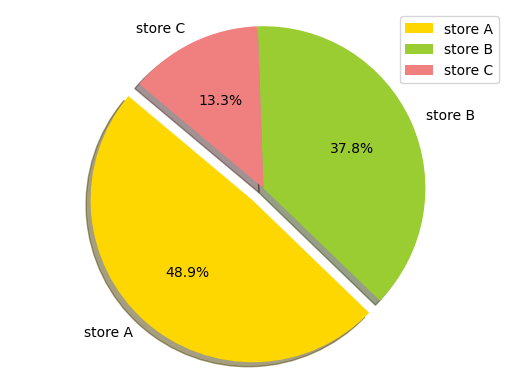

In [7]:
#pie-chart for the visual representation of store types
# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

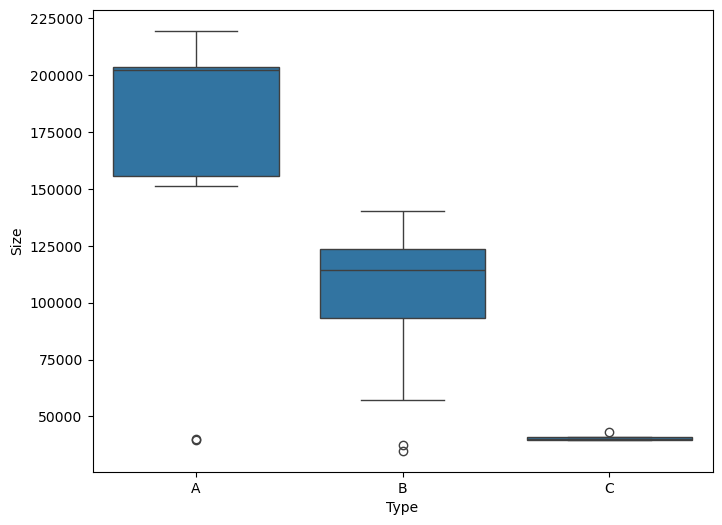

In [8]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

# train.csv
essentially the same as test.csv but with weekly sales, so no EDA for test.csv

This is the historical testing data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales - sales for the given department in the given store
IsHoliday - whether the week is a special holiday week

In [9]:
train = pd.read_csv("data/train.csv")
print(f"Shape of train.csv: {train.shape}")
train.head()

Shape of train.csv: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


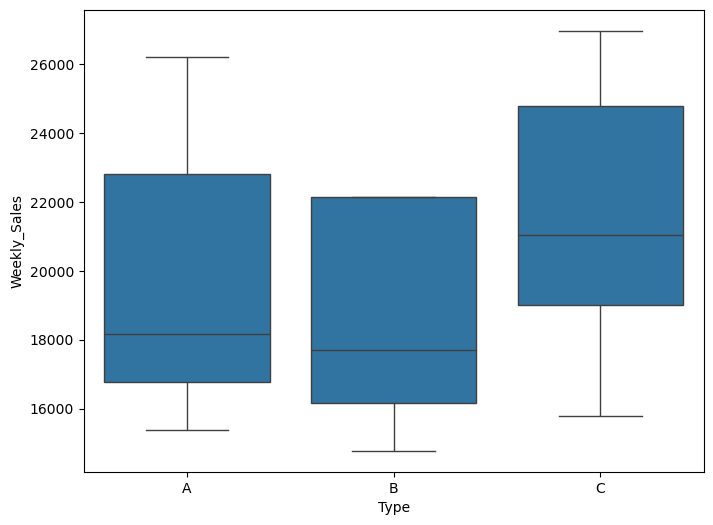

In [10]:
#boxplot for weekly sales for different types of stores :
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [11]:
# compare holiday vs non holiday
train['IsHoliday'].value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

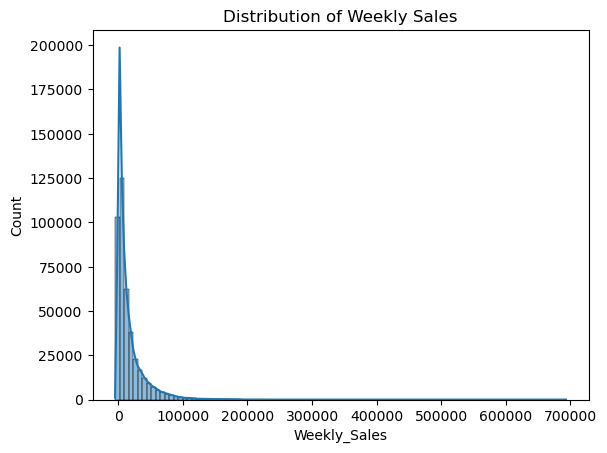

In [12]:
# look at weekly sales
sns.histplot(train['Weekly_Sales'], bins=100, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

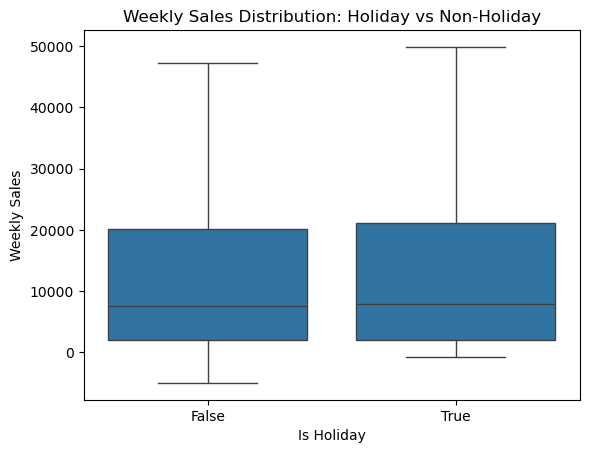

In [14]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train, showfliers=False)
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

# features.csv
This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is
running. MarkDown data is only available after Nov 2011, and is not available * for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week

Shape of features.csv: (8190, 12)


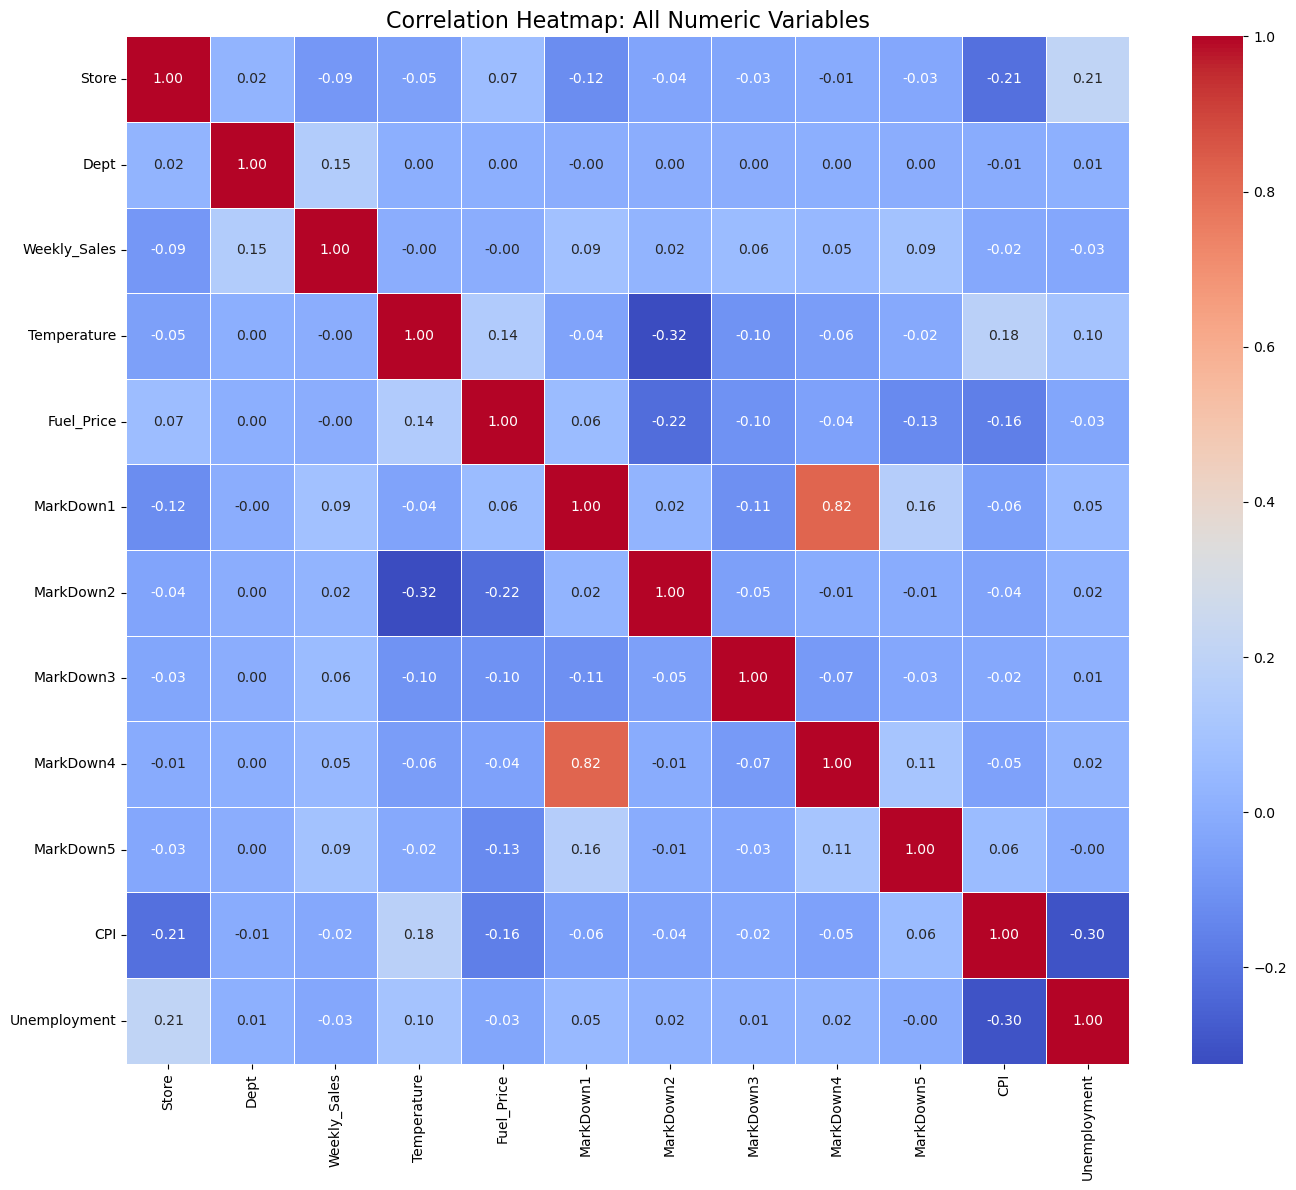

In [19]:
# heatmap to see variable correlation
features = pd.read_csv("data/features.csv", parse_dates=["Date"])
print(f"Shape of features.csv: {features.shape}")
features.head()

# Load data
features = pd.read_csv("data/features.csv", parse_dates=["Date"])
train = pd.read_csv("data/train.csv")
train['Date'] = pd.to_datetime(train['Date'])

# Merge on 'Store' and 'Date'
full_train = train.merge(features, on=['Store', 'Date'], how='left')

# Keep only numeric columns
numeric_data = full_train.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))  # Bigger size for more variables
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: All Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

# check for missing values

In [20]:
full_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [21]:
full_train.fillna(0)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False
